In [70]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
%matplotlib inline

In [72]:
# Introduction to statistics in Python
games = pd.read_csv("./appstore_games.csv")

In [73]:
games.shape

(17007, 18)

In [74]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [75]:
games.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

In [76]:
# Standardise the column headers
columns_dict = {x: x.lower().replace(" ", "_") for x in games.columns}
columns_dict_dict

NameError: name 'columns_dict_dict' is not defined

In [77]:
games.rename(columns = columns_dict, inplace = True)

In [78]:
games.set_index(keys = 'id', inplace = True)

In [79]:
games.drop(columns = ['url', 'icon_url'], inplace = True)

In [80]:
games["original_release_date"] = pd.to_datetime(games["original_release_date"])
games["current_version_release_date"] = pd.to_datetime(games["current_version_release_date"])

In [81]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          17007 non-null  object        
 1   subtitle                      5261 non-null   object        
 2   average_user_rating           7561 non-null   float64       
 3   user_rating_count             7561 non-null   float64       
 4   price                         16983 non-null  float64       
 5   in-app_purchases              7683 non-null   object        
 6   description                   17007 non-null  object        
 7   developer                     17007 non-null  object        
 8   age_rating                    17007 non-null  object        
 9   languages                     16947 non-null  object        
 10  size                          17006 non-null  float64       
 11  primary_genre  

In [82]:
# Start to check on missing values
games.isnull().sum()

name                                0
subtitle                        11746
average_user_rating              9446
user_rating_count                9446
price                              24
in-app_purchases                 9324
description                         0
developer                           0
age_rating                          0
languages                          60
size                                1
primary_genre                       0
genres                              0
original_release_date               0
current_version_release_date        0
dtype: int64

In [83]:
# Compare the missing values in average_user_rating and user_rating_count
np.array_equal(games.average_user_rating.isnull(),
              games.user_rating_count.isnull())

True

In [84]:
# Exclude rows with null values in user_ratings
games = games.loc[games.average_user_rating.notnull()]

In [85]:
games.isnull().sum()

name                               0
subtitle                        4837
average_user_rating                0
user_rating_count                  0
price                              0
in-app_purchases                2927
description                        0
developer                          0
age_rating                         0
languages                         24
size                               0
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
dtype: int64

In [86]:
# Exclude rows with a user_rating_count of less than 30
games = games.loc[games.user_rating_count >= 30]

In [87]:
games.isnull().sum()

name                               0
subtitle                        2523
average_user_rating                0
user_rating_count                  0
price                              0
in-app_purchases                1313
description                        0
developer                          0
age_rating                         0
languages                         14
size                               0
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
dtype: int64

In [88]:
games.shape

(4311, 15)

In [89]:
# Exercise 7.01: Using a string column to produce a numerical column
# 1.
games2 = games.copy()

In [90]:
games2.languages.head()

id
284921427    DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
284926400                                                   EN
284946595                                                   EN
285755462    DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
286210009                                                   EN
Name: languages, dtype: object

In [91]:
games2.languages = games2.languages.fillna("EN")

In [92]:
list_of_languages = games2.languages.str.split(",")
list_of_languages

id
284921427     [DA,  NL,  EN,  FI,  FR,  DE,  IT,  JA,  KO,  ...
284926400                                                  [EN]
284946595                                                  [EN]
285755462     [DA,  NL,  EN,  FI,  FR,  DE,  IT,  JA,  KO,  ...
286210009                                                  [EN]
                                    ...                        
1471336822                                                 [EN]
1471595571                                                 [EN]
1473181500                                                 [EN]
1473559573                                                 [EN]
1474461379                                                 [EN]
Name: languages, Length: 4311, dtype: object

In [93]:
games2['n_languages'] = list_of_languages.apply(lambda x: len(x))

In [94]:
games2.n_languages

id
284921427     17
284926400      1
284946595      1
285755462     17
286210009      1
              ..
1471336822     1
1471595571     1
1473181500     1
1473559573     1
1474461379     1
Name: n_languages, Length: 4311, dtype: int64

In [95]:
# Descriptive Statistics
random_ratings = games.average_user_rating.sample(n = 300)
for r in random_ratings:
    print(r, end = ", ")

4.0, 4.5, 5.0, 4.0, 5.0, 4.5, 3.0, 4.5, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, 4.0, 4.0, 2.5, 3.0, 4.5, 3.5, 4.5, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 5.0, 4.5, 3.5, 4.0, 4.5, 4.5, 3.5, 4.5, 4.5, 4.5, 3.0, 4.0, 4.5, 3.0, 3.5, 4.5, 4.0, 5.0, 4.5, 3.0, 4.0, 4.0, 4.0, 5.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 3.5, 4.0, 4.5, 4.5, 4.5, 4.5, 5.0, 4.0, 4.5, 4.5, 3.5, 4.0, 5.0, 4.5, 2.0, 3.5, 4.0, 4.5, 4.0, 3.5, 4.5, 2.5, 4.0, 4.5, 4.5, 4.5, 4.5, 4.5, 3.5, 4.5, 4.5, 4.5, 4.0, 4.0, 2.5, 4.5, 4.0, 4.0, 4.0, 4.5, 4.5, 4.0, 4.5, 4.0, 5.0, 4.5, 4.5, 4.0, 2.0, 4.0, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.5, 4.5, 3.0, 3.5, 4.5, 4.0, 3.5, 4.5, 3.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.0, 4.5, 4.5, 5.0, 5.0, 4.5, 3.5, 4.5, 4.5, 4.5, 3.5, 5.0, 4.0, 4.5, 3.5, 5.0, 4.5, 4.5, 4.0, 4.5, 3.0, 4.5, 2.0, 4.5, 3.5, 4.5, 4.5, 5.0, 3.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 3.0, 4.5, 4.0, 4.5, 4.5, 4.5, 3.5, 4.0, 4.0, 4.0, 1.5, 4.5, 4.5, 3.5, 4.0, 4.5, 3.0, 4.0, 4.5, 4.5, 4.0, 5.0, 4.5, 5.0, 3.5, 4.5, 3.5, 4.5, 4.5, 3.5, 4.5, 4.0, 4.5, 3.5, 

In [96]:
# Using descriptive statistics
games.describe()

,average_user_rating,user_rating_count,price,size
count,4311.000000,4.311000e+03,4311.000000,4.311000e+03
mean,4.163535,5.789754e+03,0.677878,1.759569e+08
std,0.596239,5.592425e+04,2.910916,2.866278e+08
min,1.500000,3.000000e+01,0.000000,2.158400e+05
25%,4.000000,7.000000e+01,0.000000,4.073626e+07
50%,4.500000,2.210000e+02,0.000000,9.730048e+07
75%,4.500000,1.192000e+03,0.000000,2.085176e+08
max,5.000000,3.032734e+06,139.990000,4.005591e+09


In [97]:
games.user_rating_count.sort_values(ascending = False).head(10)

id
529479190     3032734.0
1053012308    1277095.0
1330123889     711409.0
597986893      469562.0
1094591345     439776.0
672150402      400787.0
1270598321     374772.0
1116645064     283035.0
297558390      273687.0
847985808      259030.0
Name: user_rating_count, dtype: float64

In [98]:
(games.user_rating_count > 100000).sum()

40

In [99]:
# Exercise 7.02: Calculating Descriptive Statistics
# 1.
games.average_user_rating.describe()

count    4311.000000
mean        4.163535
std         0.596239
min         1.500000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: average_user_rating, dtype: float64

In [100]:
# 2.
ratings_of_4_5 = (games.average_user_rating == 4.5).sum()

prop_of_ratings_4_5 = (games.average_user_rating == 4.5).mean()

print(ratings_of_4_5)
print(prop_of_ratings_4_5)

2062
0.4783112966829042


In [101]:
# 3.
sorted(games.average_user_rating.unique())

[1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [102]:
# Exploratory Data Analysis
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 284921427 to 1474461379
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          4311 non-null   object        
 1   subtitle                      1788 non-null   object        
 2   average_user_rating           4311 non-null   float64       
 3   user_rating_count             4311 non-null   float64       
 4   price                         4311 non-null   float64       
 5   in-app_purchases              2998 non-null   object        
 6   description                   4311 non-null   object        
 7   developer                     4311 non-null   object        
 8   age_rating                    4311 non-null   object        
 9   languages                     4297 non-null   object        
 10  size                          4311 non-null   float64       
 11  primary_genre   

In [104]:
# Visualising size
games['size'] = games['size'] / 1e6

<AxesSubplot:>

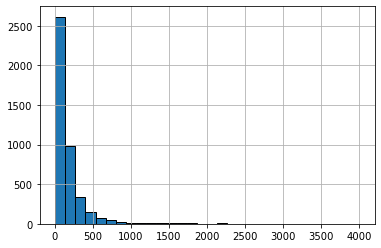

In [105]:
games['size'].hist(bins = 30, ec = 'black')

In [110]:
games['size'].describe()

count    4311.000000
mean      175.956867
std       286.627800
min         0.215840
25%        40.736256
50%        97.300480
75%       208.517632
max      4005.591040
Name: size, dtype: float64

In [111]:
games['size'].sort_values(ascending = False).head(10)

id
1245565445    4005.591040
1106831630    3916.692480
633625517     3747.742720
1235863443    3716.897792
1183898700    3599.435776
881270303     3518.277632
1107741196    3321.082880
909472985     2996.021248
1321791212    2897.696768
1298734617    2581.730304
Name: size, dtype: float64

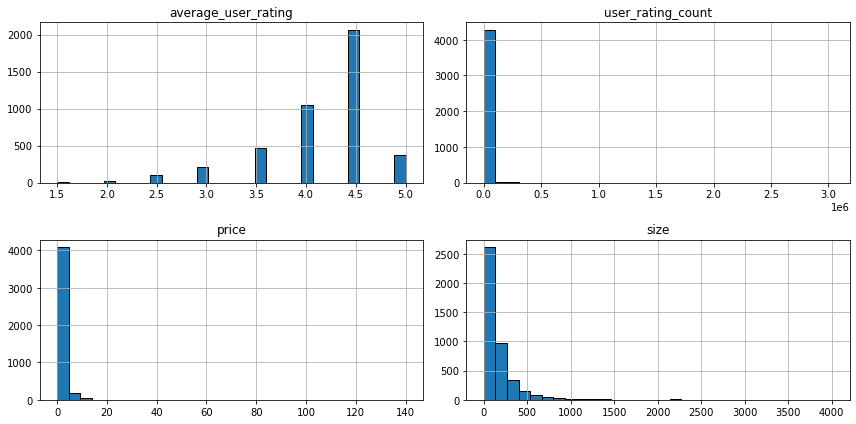

In [116]:
games.hist(figsize = (12, 6), bins = 30, ec = 'black')
plt.tight_layout()

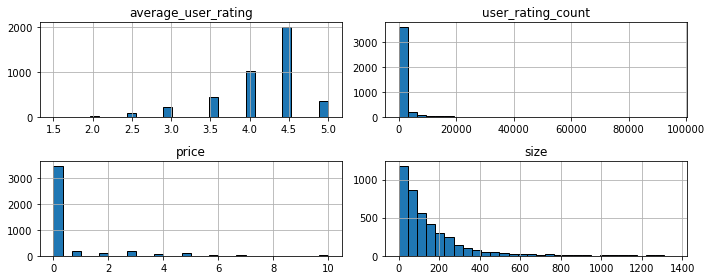

In [118]:
filter_price = games['price'] <= games['price'].quantile(0.99)
filter_user_rating_count = games['user_rating_count'] <= games['user_rating_count'].quantile(0.99)
filter_size = games['size'] <= games['size'].quantile(0.99)
filter_exclude_top = filter_price & filter_size & filter_user_rating_count

games[filter_exclude_top].hist(figsize = (10, 4), bins = 30, ec = 'black')
plt.tight_layout()

<AxesSubplot:>

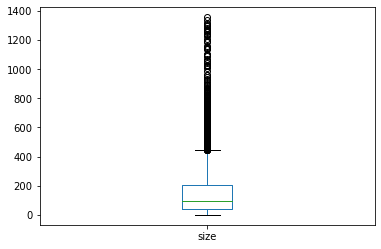

In [120]:
games['size'][filter_size].plot(kind = 'box')

In [122]:
games['age_rating'].value_counts()

4+     2287
9+      948
12+     925
17+     151
Name: age_rating, dtype: int64

<AxesSubplot:>

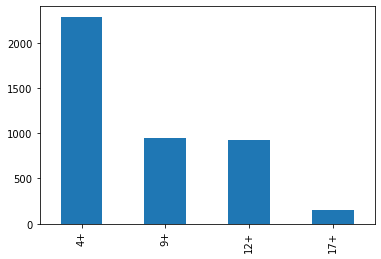

In [123]:
games['age_rating'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

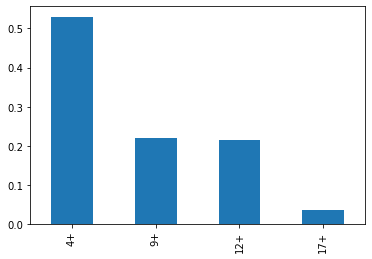

In [124]:
games['age_rating'].value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot:xlabel='size', ylabel='average_user_rating'>

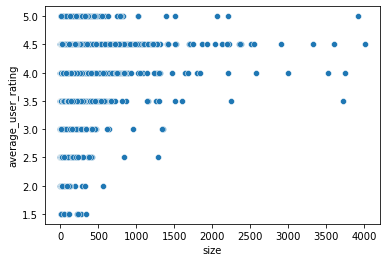

In [125]:
# Bi-Variate EDA
sns.scatterplot(x = 'size', y = 'average_user_rating', data = games)

In [132]:
ratings_mapping = {1.5: '1_poor', 2.: '1_poor', 2.5: '1_poor', 3.: '1_poor', 3.5: '2_fair', 4.: '2_fair', 4.5: '3_good', 5.: '4_excellent'}
games['cat_rating'] = games['average_user_rating'].map(ratings_mapping)

<AxesSubplot:xlabel='cat_rating', ylabel='size'>

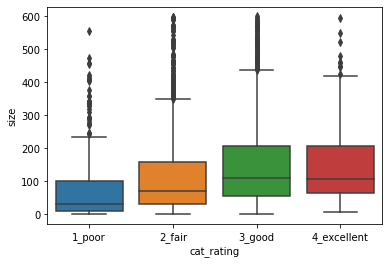

In [134]:
sns.boxplot(x = 'cat_rating', y = 'size', data = games[games['size'] <= 600], order = ['1_poor', '2_fair', '3_good', '4_excellent'])

In [135]:
pd.crosstab(games['age_rating'], games['cat_rating'])

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,57,327,466,75
17+,11,59,68,13
4+,238,821,1029,199
9+,57,309,499,83


In [136]:
100 * pd.crosstab(games['age_rating'], games['cat_rating'], normalize = 'index')

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,6.162162,35.351351,50.378378,8.108108
17+,7.284768,39.072848,45.033113,8.609272
4+,10.406646,35.898557,44.993441,8.701355
9+,6.012658,32.594937,52.637131,8.755274


In [139]:
# Exercise 7.03: Practicing EDA
# 1.
games['price'].unique()

array([  2.99,   1.99,   0.  ,   0.99,   5.99,   7.99,   4.99,   3.99,
         9.99,  19.99,   6.99,  11.99,   8.99, 139.99,  14.99,  59.99])

In [140]:
# 2.
games['round_price'] = games['price'].round()

<AxesSubplot:>

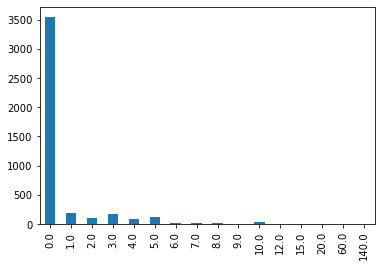

In [141]:
# 3.
games['round_price'].value_counts().sort_index().plot(kind = 'bar')

In [142]:
# 4.
games['cat_price'] = (games['round_price'] == 0).astype(int).map({0:"Paid", 1:'Free'})

<AxesSubplot:xlabel='cat_price', ylabel='average_user_rating'>

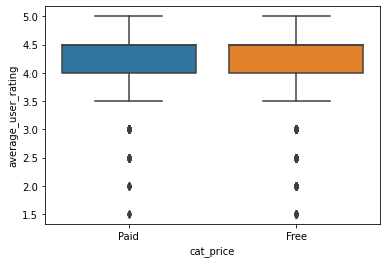

In [143]:
# 5.
sns.boxplot(x = 'cat_price', y = 'average_user_rating', data = games)

In [ ]:
# Activity 7.01: Finding out highly rated strategy games
# 1. -> 3. complete

In [146]:
# 4.
games.shape

(4311, 18)

In [ ]:
# 5. Complete

In [ ]:
# 6. Complete

In [158]:
# 7.
games['languages'].str.split(",").str.len()

games['multilingal'] = (games['languages'].str.split(",").str.len() == 1).map({False: 'Multilingual', True: 'Monolingual'})

id
284921427     False
284926400      True
284946595      True
285755462     False
286210009      True
              ...  
1471336822     True
1471595571     True
1473181500     True
1473559573     True
1474461379     True
Name: languages, Length: 4311, dtype: bool

In [161]:
games['multilingal'].value_counts()

Monolingual     2558
Multilingual    1753
Name: multilingal, dtype: int64

In [164]:
# 8.
games['fee_language'] = games['cat_price'] + "-" + games['multilingal']

In [165]:
games['fee_language']

id
284921427     Paid-Multilingual
284926400      Paid-Monolingual
284946595      Free-Monolingual
285755462     Free-Multilingual
286210009      Free-Monolingual
                    ...        
1471336822     Free-Monolingual
1471595571     Free-Monolingual
1473181500     Free-Monolingual
1473559573     Free-Monolingual
1474461379     Free-Monolingual
Name: fee_language, Length: 4311, dtype: object

In [166]:
games['fee_language'].value_counts()

Free-Monolingual     2092
Free-Multilingual    1452
Paid-Monolingual      466
Paid-Multilingual     301
Name: fee_language, dtype: int64

In [167]:
games.groupby('fee_language')['average_user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
fee_language,,,,,,,,
Free-Monolingual,2092.0,4.131453,0.632437,1.5,4.0,4.5,4.5,5.0
Free-Multilingual,1452.0,4.223485,0.531067,1.5,4.0,4.5,4.5,5.0
Paid-Monolingual,466.0,4.062232,0.656965,1.5,3.5,4.0,4.5,5.0
Paid-Multilingual,301.0,4.254153,0.487536,2.5,4.0,4.5,4.5,5.0
